# **Step 1 : Importing the Libraries**

In [21]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

# **Step 2 : Loading the Data and Creating a DataFrame**

In [2]:
iris = load_iris()

In [9]:
# Create a Dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# **Step 3 : Basic Info and Structure Check**
Let's take a look at the data, figure out if there is any missing data (basically preprocessing)

In [11]:
df.shape

(150, 6)

In [13]:
df['target_name'].value_counts()

,count
target_name,
setosa,50
versicolor,50
virginica,50


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0
target_name,0


Woah, this data is evenly distributed and has no missing data! That's amazing.

# **Step 4 : Pretty Visuals - EDA Time!**

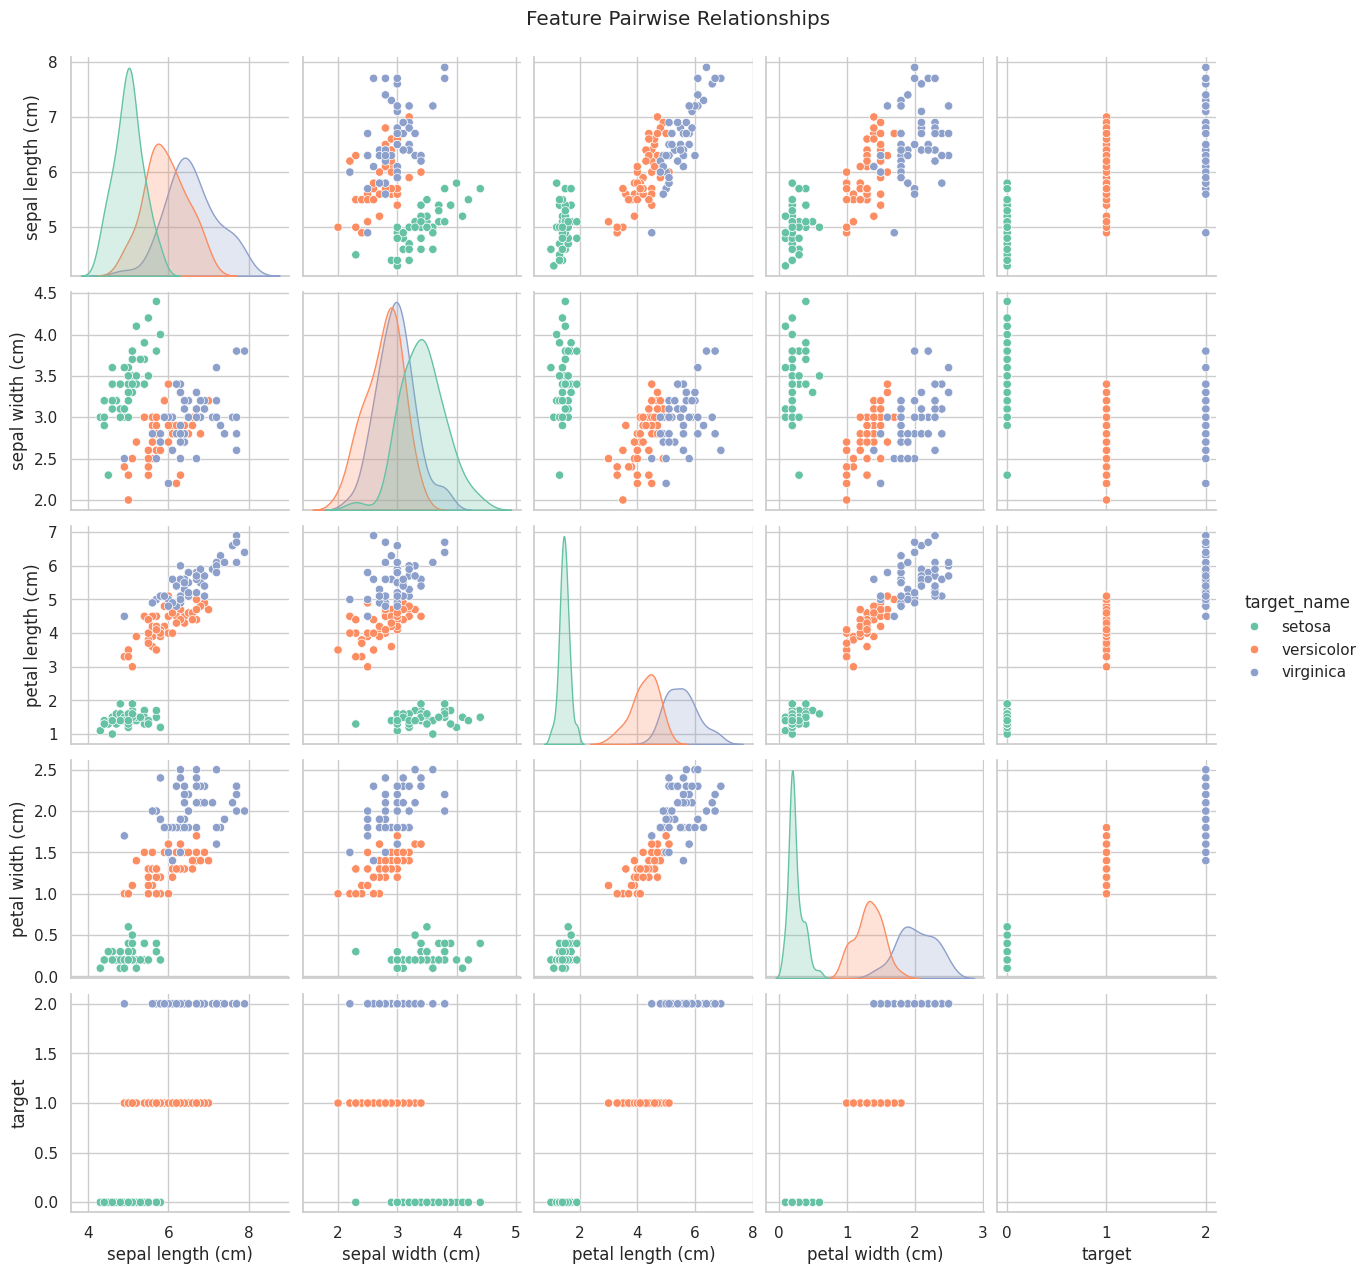

In [18]:
sns.pairplot(df, hue='target_name', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle("Feature Pairwise Relationships", y=1.02)
plt.show()

Woah, that reveals some stuff.


*   Setosa (the greens) are very separate from the others - easy to classify later on.
*   On the other hand Versicolor and Virginica overlap quite a bit, so they can be a bit harder to classify.



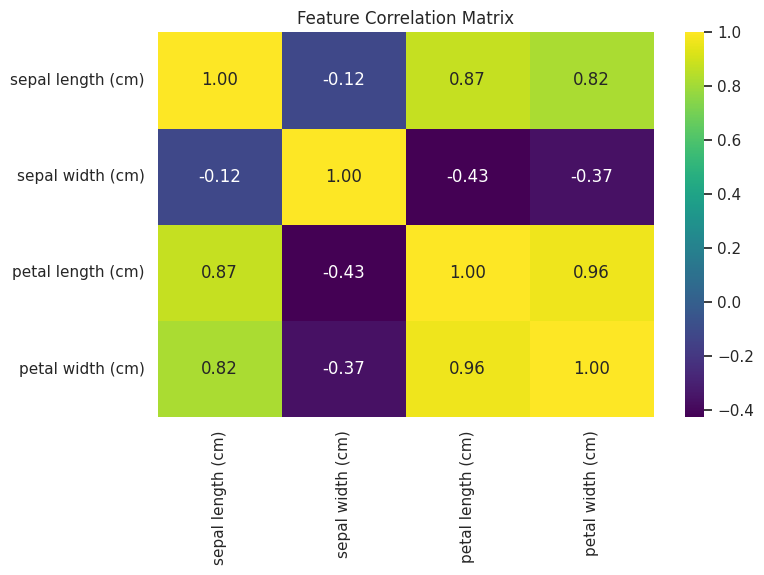

In [20]:
plt.figure(figsize=(8, 5))
corr = df.iloc[:, :4].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

This is already a pretty correlation plot, but I think we can improve it.

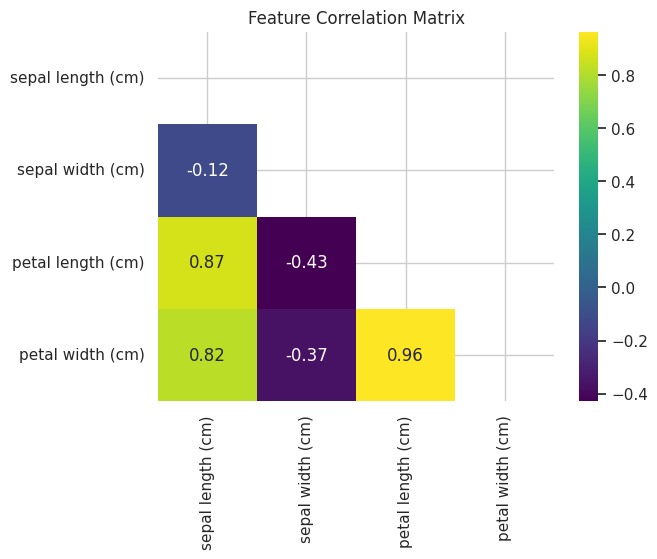

In [29]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', mask=mask)
plt.title("Feature Correlation Matrix")
plt.show()

Observations :     



*   Petal Length and Petal Width are strongly correlated.
*   Sepal Width has a low correlation with others.



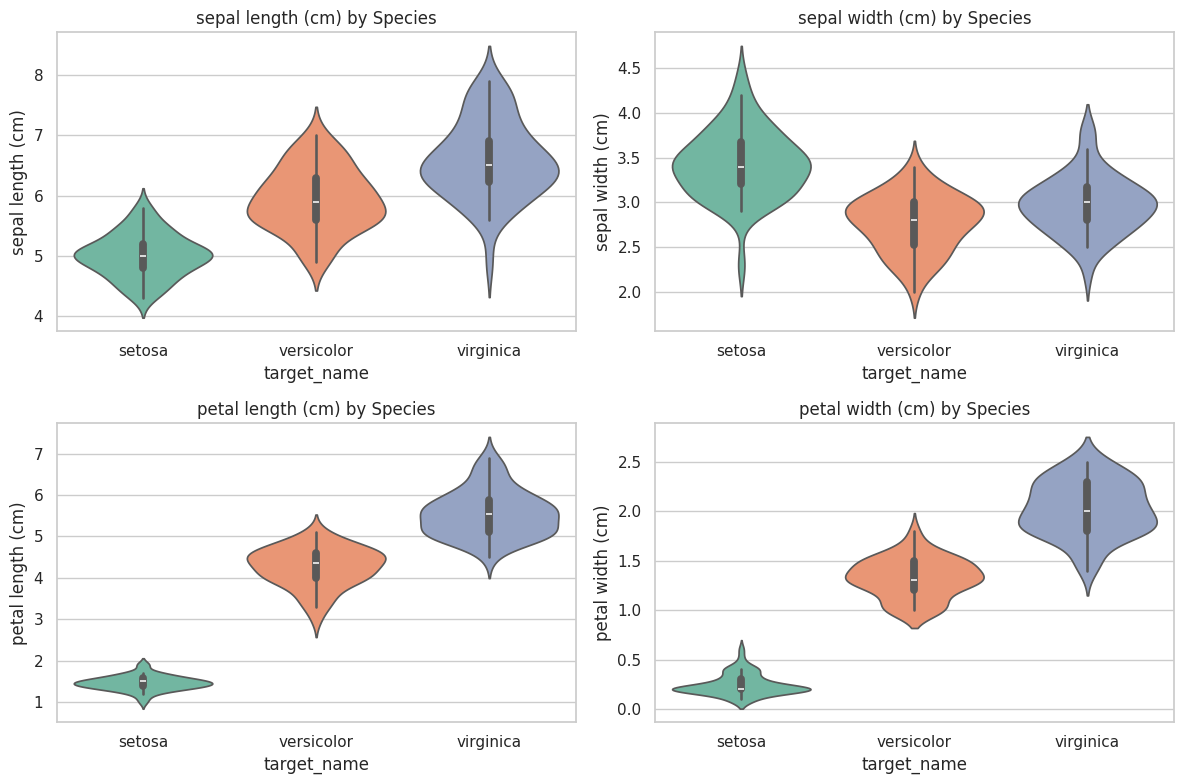

In [32]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:4]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='target_name', y=col, data=df, palette='Set2', hue='target_name', legend=False)
    plt.title(f'{col} by Species')
plt.tight_layout()
plt.show()

Observations :    



*   Setosa has very small petal lengths in comparison while Virginica has large petal lengths.
*   Can be easily separated by petal size (I hope)



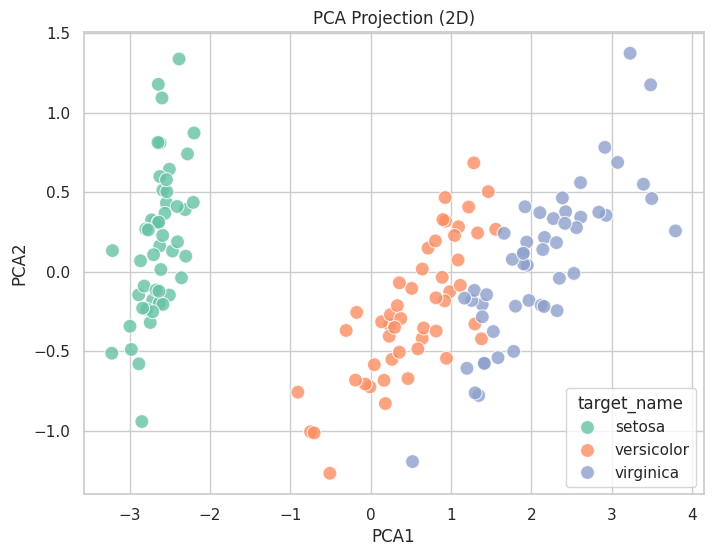

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :4])

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='target_name', palette='Set2', s=100, alpha=0.8)
plt.title("PCA Projection (2D)")
plt.show()

**What is PCA?**

PCA stands for Principal Component Analysis. It helps reduce the number of features (columns) while keeping as much of the original data’s information as possible.

It's mostly used for:

*   Visualization (turn 4D or 10D data into 2D or 3D to plot)
*   Speeding up ML algorithms (by removing less important features)



**How does it work?**

Your data may be in 4D (like the Iris dataset: 4 features)

PCA finds the best 2 directions (called principal components) that capture the most variance (differences between samples)

Then it projects (compresses) your data into those 2 directions.

Now, since we are done with visualising our data, let's move on to model training and testing..

# **Step 5 : Training and Testing Data Split**

##**SubStep 1 : Train-Test Split**

We'll split our dataset into a training set (to learn from) and a testing set (to evaluate performance).

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Features(X) and Targets(y)
X = df.iloc[:, :4]
y = df['target']

In [41]:
# Split : 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

## **SubStep 2 : Importing the Models and the Metrics**

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


🔍 Logistic Regression
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



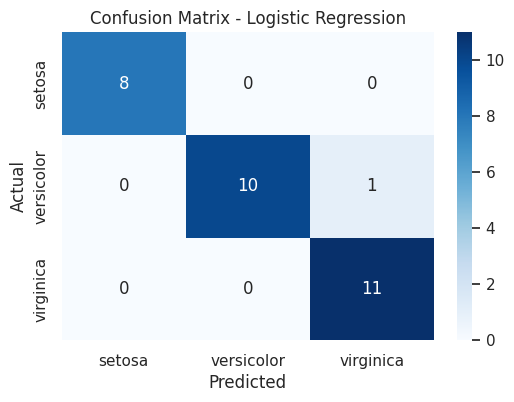


🔍 KNN (k=5)
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.82      0.90        11
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



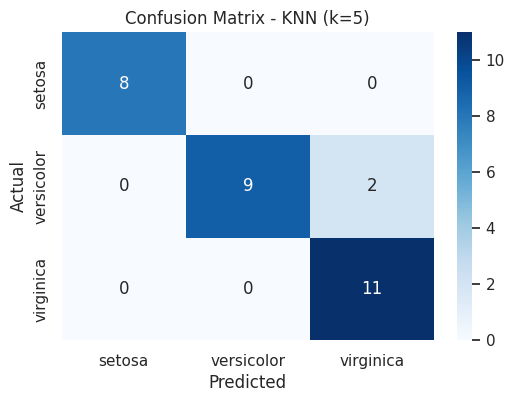


🔍 Decision Tree
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.82      0.90        11
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



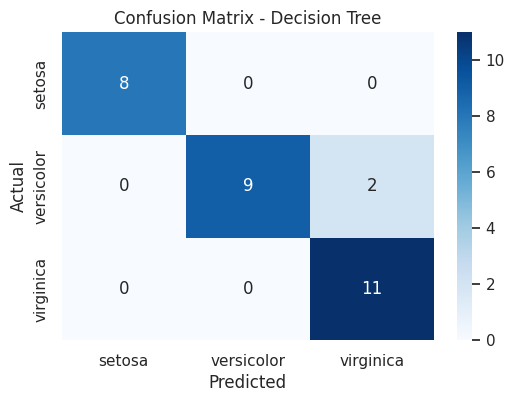


🔍 SVM (Linear Kernel)
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.82      0.90        11
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



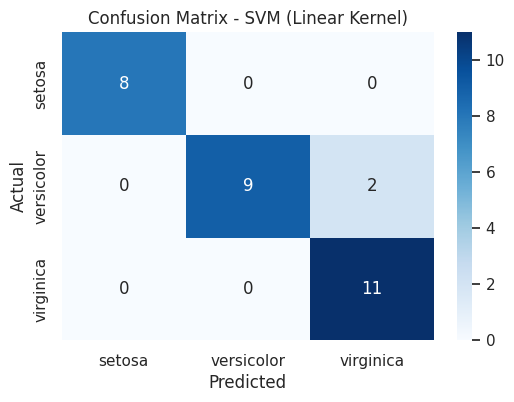


🔍 Random Forest
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.91      0.91      0.91        11
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



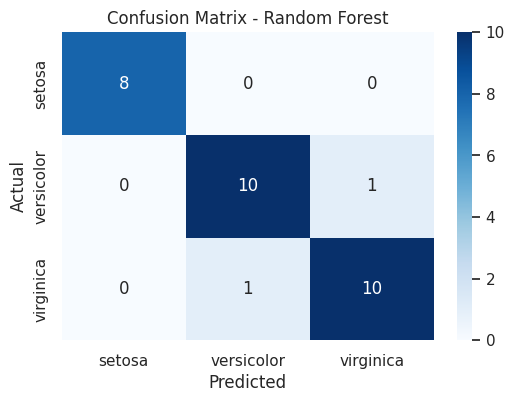

In [61]:
# Dictionary to store models and predictions
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=5),
    "SVM (Linear Kernel)": SVC(kernel='linear', random_state=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=5)
}

results = []

# Loop through models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n🔍 {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

**What each column means:**
**Precision** = out of all predictions the model made for this class, how many were actually correct?

`precision = TP / (TP + FP)`

**Recall** = out of all actual samples of this class, how many did the model correctly identify?

`recall = TP / (TP + FN)`

**F1-score** = harmonic mean of precision and recall, it balances both, especially useful for imbalanced classes.

**Support** = number of true samples of each class in test set

In [56]:
# Display as DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.966667
1            KNN (k=5)  0.933333
2        Decision Tree  0.933333
3  SVM (Linear Kernel)  0.933333
4        Random Forest  0.933333


All five models performed remarkably well on the Iris dataset, with Logistic Regression achieving the highest accuracy at 96.67%. The others closely followed at ~93.33%, showing that this is a well-behaved, linearly separable dataset.

# **Step 6 : Analysing our Results**

## **1. Looking at the decision boundaries for each model**

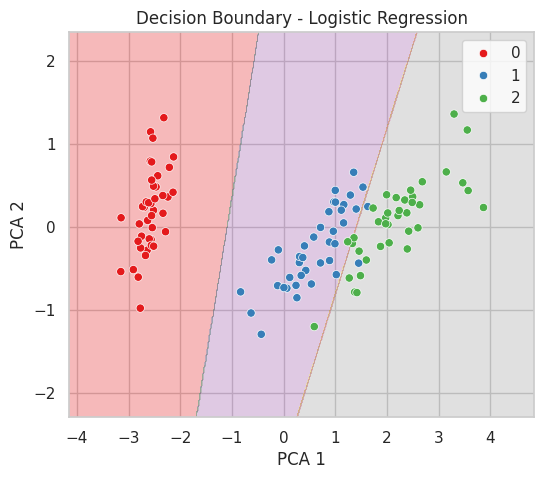

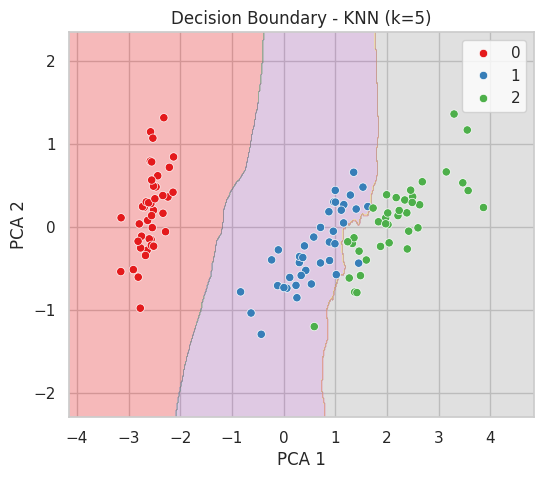

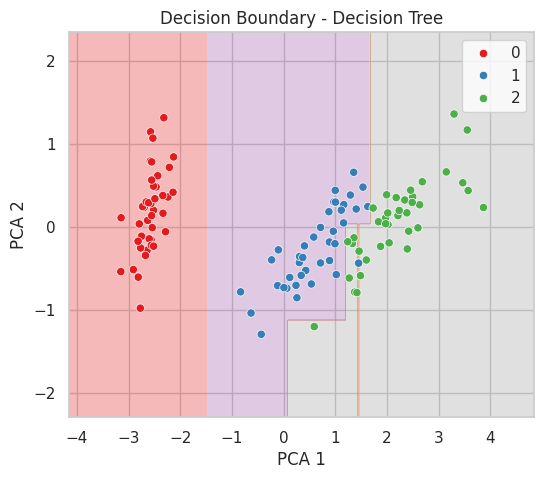

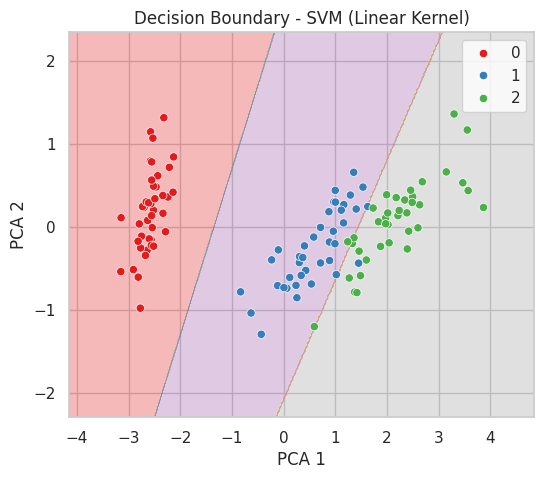

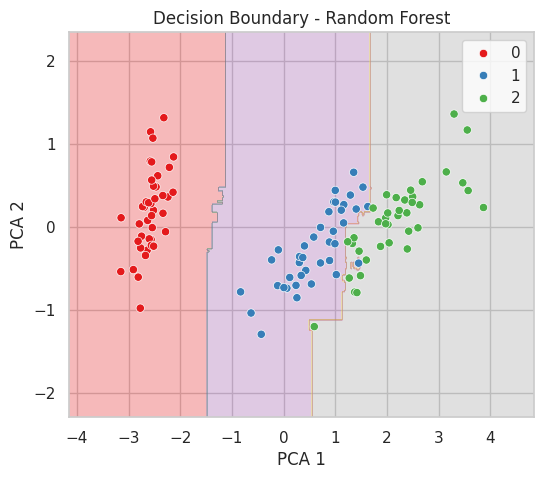

In [62]:
from sklearn.decomposition import PCA
import numpy as np

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Train all models on 2D data
for name, model in models.items():
    model.fit(X_train_2D, y_train)

    # Plot decision boundary
    h = 0.02
    x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
    y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
    sns.scatterplot(x=X_train_2D[:, 0], y=X_train_2D[:, 1], hue=y_train, palette='Set1')
    plt.title(f'Decision Boundary - {name}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


Woah, these decision boundaries look very insane and these are very insightful in seeing how the different models classify data!

To visually understand how each model separates the classes, I projected the data into 2D using PCA and plotted their decision boundaries.

These plots reveal how models like SVM and Logistic Regression draw clear linear boundaries, while tree-based models create more irregular, axis-aligned splits.

This helps interpret each model’s behavior and its capability to generalize.

## **2. Feature Importance (for Decision Tree and Random Forest)**

Now, let's look at how important different features are.

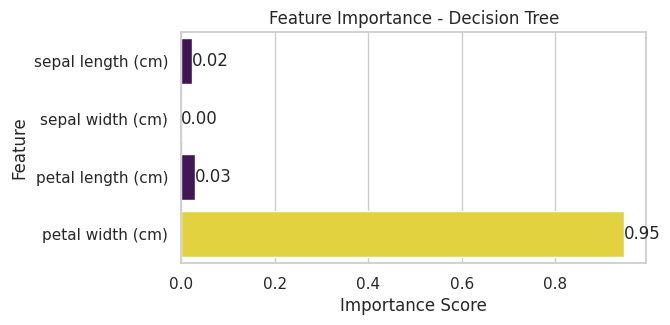

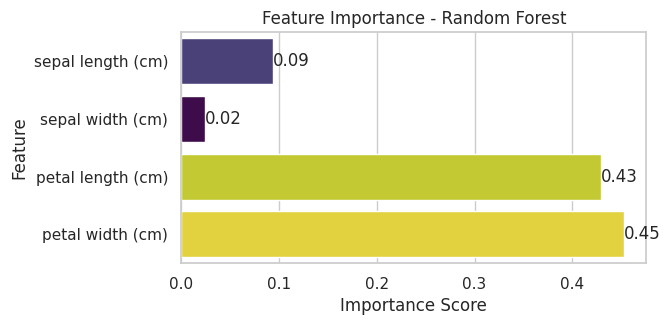

In [66]:
# Feature importance for Decision Tree and Random Forest
tree_models = {
    "Decision Tree": models["Decision Tree"],
    "Random Forest": models["Random Forest"]
}

for name, model in tree_models.items():
    model.fit(X_train, y_train)
    importances = model.feature_importances_

    plt.figure(figsize=(6, 3))
    ax = sns.barplot(x=importances, y=iris.feature_names, palette='viridis', hue=importances, legend=False)
    plt.title(f'Feature Importance - {name}')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')

    # Add labels to the bars
    for index, value in enumerate(importances):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

We used Decision Tree and Random Forest models to analyze feature importance, revealing how each model weighs input features differently.

The Decision Tree gave very high importance to petal width (≈0.95), relying heavily on a single feature, while Random Forest distributed importance more evenly, with petal length and petal width both contributing significantly.

This contrast highlights how ensemble models like Random Forest reduce overfitting by considering multiple features, offering a more balanced view of what drives predictions.

# **Some Final Words**

All five classification models performed impressively on the Iris dataset, with Logistic Regression showing the highest test accuracy and cross-validation score.  
The decision boundaries reveal that the dataset is linearly separable, favoring models like SVM and Logistic Regression.  
Tree-based models like Random Forest provide useful insights into feature importance, confirming that **petal length** and **petal width** are the strongest predictors.  
This project showcases how different ML algorithms behave on a clean, well-structured dataset — and highlights the strengths of both interpretable models and ensemble methods.

This project really helped me learn a lot about Machine Learning Models and it was very informative and fun to work on it!